## Importing all the necessary Libraries

In [1]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

c:\Users\sureenipa.c.AWARE\Documents\Netfix stock price prediction using Facebook Prophet\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing the Dataset & Exploring it

In [2]:
df = pd.read_csv("NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-03,224.789993,228.100006,222.419998,226.729996,226.729996,6400700
1,2022-08-04,227.679993,232.070007,225.050003,229.910004,229.910004,7142700
2,2022-08-05,225.300003,228.619995,222.869995,226.779999,226.779999,5539700
3,2022-08-08,227.490005,241.960007,226.410004,233.490005,233.490005,10982100
4,2022-08-09,231.619995,232.199997,224.649994,229.940002,229.940002,6181200
...,...,...,...,...,...,...,...
246,2023-07-27,426.899994,427.519989,411.880005,413.170013,413.170013,6594500
247,2023-07-28,415.559998,427.470001,413.760010,425.779999,425.779999,6424200
248,2023-07-31,426.510010,439.130005,426.299988,438.970001,438.970001,6587600
249,2023-08-01,437.369995,445.250000,431.399994,438.619995,438.619995,5711500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,320.038446,325.884143,314.946455,320.661953,320.661953,8.668120e+06
std,65.637717,65.814773,65.329735,65.784893,65.784893,5.136193e+06
min,212.690002,223.669998,211.729996,214.289993,214.289993,2.657900e+06
25%,273.625000,284.074996,270.179993,275.925003,275.925003,5.614500e+06
50%,319.010010,324.149994,313.390015,317.829987,317.829987,7.160100e+06
75%,357.229996,363.960006,353.129989,359.479995,359.479995,9.584100e+06
max,476.859985,485.000000,470.000000,477.589996,477.589996,4.668530e+07


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [5]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [6]:
px.area(df,x='Date',y='Close')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'fillpattern': {'shape': ''},
              'hovertemplate': 'Date=%{x}<br>Close=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'stackgroup': '1',
              'type': 'scatter',
              'x': array(['2022-08-03', '2022-08-04', '2022-08-05', ..., '2023-07-31',
                          '2023-08-01', '2023-08-02'], dtype=object),
              'xaxis': 'x',
              'y': array([226.729996, 229.910004, 226.779999, ..., 438.970001, 438.619995,
                          429.700012]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Close'}}}
})

In [7]:
px.line(df,x='Date',y='Close')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Date=%{x}<br>Close=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['2022-08-03', '2022-08-04', '2022-08-05', ..., '2023-07-31',
                          '2023-08-01', '2023-08-02'], dtype=object),
              'xaxis': 'x',
              'y': array([226.729996, 229.910004, 226.779999, ..., 438.970001, 438.619995,
                          429.700012]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Close'}}}
})

In [8]:
px.area(df,x='Date',y='Volume')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'fillpattern': {'shape': ''},
              'hovertemplate': 'Date=%{x}<br>Volume=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'stackgroup': '1',
              'type': 'scatter',
              'x': array(['2022-08-03', '2022-08-04', '2022-08-05', ..., '2023-07-31',
                          '2023-08-01', '2023-08-02'], dtype=object),
              'xaxis': 'x',
              'y': array([6400700, 7142700, 5539700, ..., 6587600, 5711500, 4912200], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Volume'}}}
})

In [9]:
px.bar(df,y='Volume')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'index=%{x}<br>Volume=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([  0,   1,   2, ..., 248, 249, 250], dtype=int64),
              'xaxis': 'x',
              'y': array([6400700, 7142700, 5539700, ..., 6587600, 5711500, 4912200], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Volume'}}}
})

In [11]:
px.box(df,y='Close')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Close=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': array([226.729996, 229.910004, 226.779999, ..., 438.970001, 438.619995,
                          429.700012]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Close'}}}
})

## Data Preperation

In [13]:
column=['Date','Close']
ndf = pd.DataFrame(df, columns=column)
ndf

,Date,Close
0,2022-08-03,226.729996
1,2022-08-04,229.910004
2,2022-08-05,226.779999
3,2022-08-08,233.490005
4,2022-08-09,229.940002
...,...,...
246,2023-07-27,413.170013
247,2023-07-28,425.779999
248,2023-07-31,438.970001
249,2023-08-01,438.619995


In [15]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})
prophet_df

,ds,y
0,2022-08-03,226.729996
1,2022-08-04,229.910004
2,2022-08-05,226.779999
3,2022-08-08,233.490005
4,2022-08-09,229.940002
...,...,...
246,2023-07-27,413.170013
247,2023-07-28,425.779999
248,2023-07-31,438.970001
249,2023-08-01,438.619995


## Creating Facebook Prophet Model

In [16]:
m = Prophet()
m.fit(prophet_df)

17:35:25 - cmdstanpy - INFO - Chain [1] start processing
17:35:25 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

In [17]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-03,221.183389,197.572463,245.806555,221.183389,221.183389,-0.638546,-0.638546,-0.638546,-0.638546,-0.638546,-0.638546,0.0,0.0,0.0,220.544843
1,2022-08-04,221.647162,198.294515,246.154862,221.647162,221.647162,0.286143,0.286143,0.286143,0.286143,0.286143,0.286143,0.0,0.0,0.0,221.933305
2,2022-08-05,222.110935,199.441289,247.777023,222.110935,222.110935,-0.202467,-0.202467,-0.202467,-0.202467,-0.202467,-0.202467,0.0,0.0,0.0,221.908468
3,2022-08-08,223.502253,199.286866,245.298200,223.502253,223.502253,-1.485918,-1.485918,-1.485918,-1.485918,-1.485918,-1.485918,0.0,0.0,0.0,222.016335
4,2022-08-09,223.966025,198.190149,244.569355,223.966025,223.966025,-2.926151,-2.926151,-2.926151,-2.926151,-2.926151,-2.926151,0.0,0.0,0.0,221.039874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2023-08-28,498.408994,472.624612,521.681706,495.291942,501.522458,-1.485918,-1.485918,-1.485918,-1.485918,-1.485918,-1.485918,0.0,0.0,0.0,496.923076
277,2023-08-29,499.718273,472.377829,520.280822,496.417934,502.978743,-2.926151,-2.926151,-2.926151,-2.926151,-2.926151,-2.926151,0.0,0.0,0.0,496.792122
278,2023-08-30,501.027552,476.576576,524.470188,497.531367,504.522986,-0.638546,-0.638546,-0.638546,-0.638546,-0.638546,-0.638546,0.0,0.0,0.0,500.389006
279,2023-08-31,502.336831,479.198251,528.206300,498.696365,506.017732,0.286143,0.286143,0.286143,0.286143,0.286143,0.286143,0.0,0.0,0.0,502.622974


In [18]:
px.line(forecast,x='ds',y='yhat')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'ds=%{x}<br>yhat=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2022, 8, 3, 0, 0),
                          datetime.datetime(2022, 8, 4, 0, 0),
                          datetime.datetime(2022, 8, 5, 0, 0), ...,
                          datetime.datetime(2023, 8, 30, 0, 0),
                          datetime.datetime(2023, 8, 31, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([220.54484312, 221.93330527, 221.90846789, ..., 500.38900569,
                          502.6229739 , 503.4436426 ]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'ds'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'yhat'}}}
})

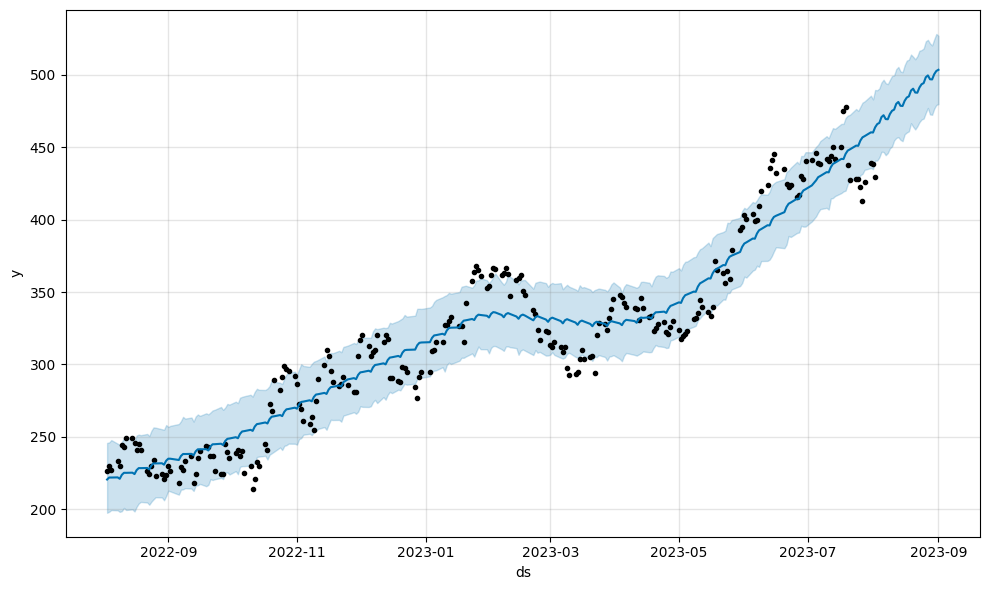

In [19]:
figure = m.plot(forecast,xlabel='ds',ylabel='y')

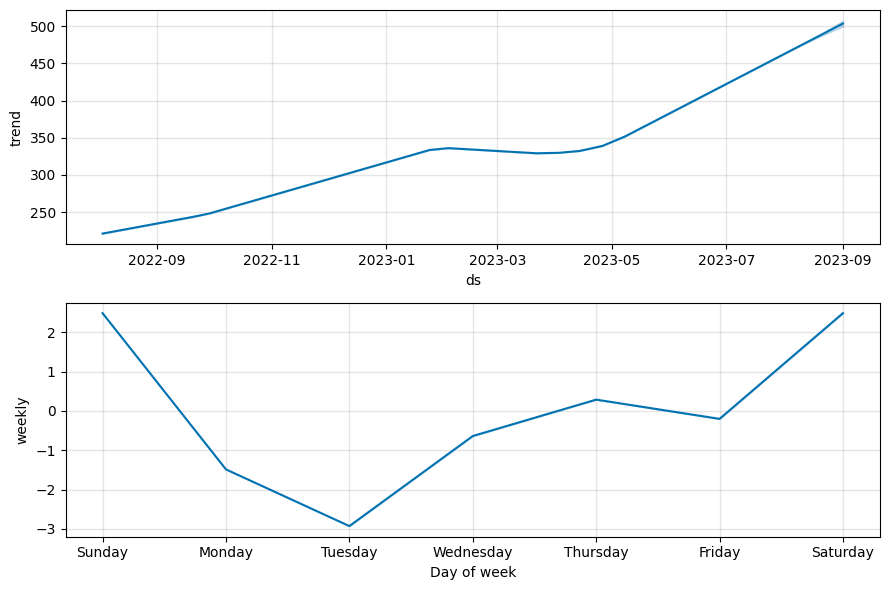

In [20]:
figure2 = m.plot_components(forecast)

In [21]:
forecast.to_csv('forecast.csv')